<a href="https://colab.research.google.com/github/ammusin/SCT_ML_TASK01/blob/main/Prize_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape

(13320, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
********************
size
2 BHK    

In [7]:
data.drop(columns=['area_type','availability','society','balcony'], inplace=True)

In [8]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [10]:
data['location'].value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
Bapuji Layout,1
1st Stage Radha Krishna Layout,1
BEML Layout 5th stage,1


In [11]:
data['location']=data['location'].fillna('Sarjapur Road')

In [12]:
data['size']=data['size'].fillna('2 BHK')

In [13]:
data['bath']=data['bath'].fillna(data['bath'].median())

In [14]:
print(data['total_sqft'].isna().sum())  # Check the number of NaN values


0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [16]:
data['bhk']=data['size'].str.split().str.get(0).astype(int)

In [17]:
data[data.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [20]:
# Filter out rows where 'total_sqft' contains a range (i.e., contains '-')
data = data[~data['total_sqft'].str.contains('-')]

# Alternatively, if you also want to remove non-numeric entries, you can apply this:
data = data[data['total_sqft'].str.isnumeric()]

# Reset the index if necessary after removing rows
data.reset_index(drop=True, inplace=True)


In [21]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [22]:
# Convert 'total_sqft' to numeric, coerce any non-convertible values to NaN
data['total_sqft'] = pd.to_numeric(data['total_sqft'], errors='coerce')

# Recalculate 'price_per_sqft' after conversion
data['price_per_sqft'] = data['price'] * 100000 / data['total_sqft']

# Optionally, you can drop rows with NaN in 'total_sqft' if they are no longer needed
data = data.dropna(subset=['total_sqft'])


In [23]:
data['price_per_sqft']

,price_per_sqft
0,3699.810606
1,4615.384615
2,4305.555556
3,6245.890861
4,4250.000000
...,...
12981,6689.834926
12982,11111.111111
12983,5258.545136
12984,10407.336319


In [24]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12986.000000,12986.000000,12986.000000,12986.000000,1.298600e+04
mean,1553.842292,2.689050,112.271405,2.804174,7.949866e+03
std,1241.134525,1.336677,149.654895,1.296214,1.076022e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.261226e+03
50%,1272.000000,2.000000,71.525000,3.000000,5.444545e+03
75%,1665.000000,3.000000,120.000000,3.000000,7.325581e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [25]:
data.size

90902

In [26]:
data.shape

(12986, 7)

In [27]:
data['location'].value_counts()

,count
location,
Whitefield,518
Sarjapur Road,386
Electronic City,302
Kanakpura Road,259
Thanisandra,221
...,...
K R C kothanur,1
Maruthi HBCS Layout,1
1Channasandra,1


In [28]:
data['location']=data['location'].apply(lambda x: x.strip())
location_count=data['location'].value_counts()

In [29]:
location_count

,count
location,
Whitefield,519
Sarjapur Road,386
Electronic City,304
Kanakpura Road,259
Thanisandra,224
...,...
1st Stage Radha Krishna Layout,1
BEML Layout 5th stage,1
Kannur,1


In [30]:
location_count_less_10=location_count[location_count<=10]
location_count_less_10

,count
location,
Tindlu,10
Naganathapura,10
Dairy Circle,10
Ganga Nagar,10
Thyagaraja Nagar,10
...,...
1st Stage Radha Krishna Layout,1
BEML Layout 5th stage,1
Kannur,1


In [31]:
data['location']=data['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [32]:
data['location'].value_counts()

,count
location,
other,2873
Whitefield,519
Sarjapur Road,386
Electronic City,304
Kanakpura Road,259
...,...
Narayanapura,11
Doddaballapur,11
2nd Phase Judicial Layout,11


In [33]:
(data['total_sqft']/data['bhk']).describe()

,0
count,12986.000000
mean,573.118876
std,391.024728
min,0.250000
25%,471.666667
50%,550.500000
75%,625.000000
max,26136.000000


In [34]:
data=data[((data['total_sqft']/data['bhk'])>=300)]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12242.000000,12242.000000,12242.000000,12242.000000,12242.000000
mean,1589.250531,2.558324,111.163874,2.649894,6311.195436
std,1264.806713,1.071836,152.753368,0.974700,4187.499812
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4202.759655
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [35]:
data.shape

(12242, 7)

In [36]:
data.price_per_sqft.describe()

,price_per_sqft
count,12242.000000
mean,6311.195436
std,4187.499812
min,267.829813
25%,4202.759655
50%,5294.117647
75%,6916.666667
max,176470.588235


In [37]:
def remove_outliers_sqft(df):
    df_output=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        gen_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)
    return df_output
data=remove_outliers_sqft(data)
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10088.000000,10088.000000,10088.000000,10088.00000,10088.000000
mean,1502.065920,2.470262,90.885027,2.57276,5658.377597
std,876.063952,0.972767,86.285530,0.89559,2265.804635
min,300.000000,1.000000,10.000000,1.00000,1250.000000
25%,1109.000000,2.000000,49.000000,2.00000,4237.918216
50%,1280.000000,2.000000,67.000000,2.00000,5176.116129
75%,1645.000000,3.000000,100.000000,3.00000,6428.571429
max,30400.000000,16.000000,2200.000000,16.00000,24509.803922


In [38]:
def bhk_outlier_remover(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
            for bhk,bhk_df in location_df.groupby('bhk'):
                stats=bhk_stats.get(bhk-1)
                if stats and stats['count']>5:
                   exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
        return df.drop(exclude_indices,axis='index')

In [39]:
data=bhk_outlier_remover(data)

In [40]:
data.shape

(10088, 7)

In [41]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10083,other,2 BHK,1353,2.0,110.00,2,8130.081301
10084,other,1 Bedroom,812,1.0,26.00,1,3201.970443
10085,other,3 BHK,1440,2.0,63.93,3,4439.583333
10086,other,2 BHK,1075,2.0,48.00,2,4465.116279


In [42]:
data.drop(columns=['size','price_per_sqft'],inplace=True)

In [43]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850,4.0,428.0,4
1,1st Block Jayanagar,1630,3.0,194.0,3
2,1st Block Jayanagar,1875,2.0,235.0,3
3,1st Block Jayanagar,1200,2.0,130.0,3
4,1st Block Jayanagar,1235,2.0,148.0,2


In [44]:
data.to_csv("Cleaned_data.csv")

In [45]:
x=data.drop(columns=['price'])
y=data['price']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [47]:

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [48]:
print(X_train.shape)
print(X_test.shape)

(8070, 4)
(2018, 4)


# **APPLYING LINEAR REGRESSION**

In [49]:
column_trans = make_column_transformer((OneHotEncoder(sparse_output=False), ['location']),
                                       remainder='passthrough')


In [50]:
scaler=StandardScaler()

In [51]:
lr=LinearRegression()

In [52]:

pipe=make_pipeline(column_trans,scaler,lr)

In [53]:
# Fit the pipeline
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [54]:
y_pred_lr=pipe.predict(X_test)

In [55]:
r2_score(y_test,y_pred_lr)

0.8299987500153665

In [56]:
ridge=Ridge()
pipe=make_pipeline(column_trans,scaler,ridge)
pipe.fit(X_train,y_train)
y_pred_ridge=pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.830202707177313

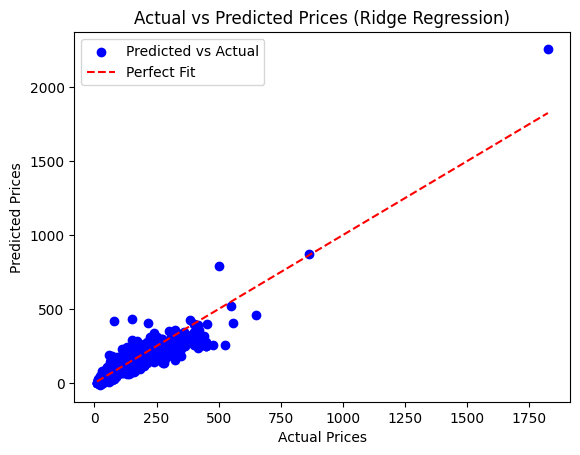

In [57]:
import matplotlib.pyplot as plt

# Predict values using the model
y_pred_ridge = pipe.predict(X_test)

# Create a scatter plot of actual vs predicted
plt.scatter(y_test, y_pred_ridge, color='blue', label='Predicted vs Actual')

# Add a line for perfect predictions (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Ridge Regression)')
plt.legend()
plt.show()


In [ ]:
print("No Regularization",r2_score(y_test,y_pred_lr))
print("L2 Regularization",r2_score(y_test,y_pred_ridge))

No Regularization 0.8299987500153665
L2 Regularization 0.830202707177313


In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open('RidgeModel.pkl','wb'))